# Centralities with momepy

Use momepy to compute centralities

In [2]:
!pip install momepy

     |████████████████████████████████| 226 kB 10.1 MB/s eta 0:00:01


In [4]:
import geopandas as gpd
import momepy
import osmnx as ox
import matplotlib.pyplot as plt

In [5]:
streets_graph = ox.graph_from_place('Vicenza, Vicenza, Italy', network_type='drive')
streets_graph = ox.projection.project_graph(streets_graph)

In [6]:
edges = ox.graph_to_gdfs(streets_graph, nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

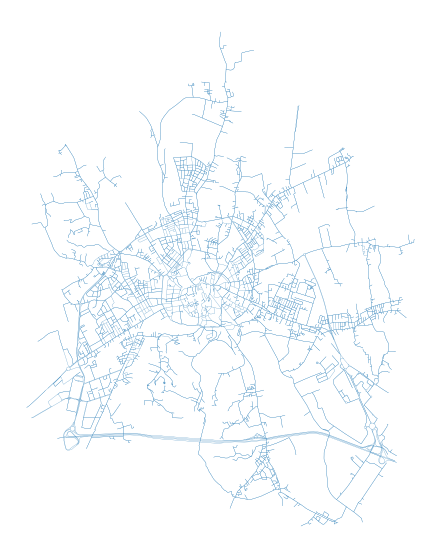

In [7]:
f, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=0.2)
ax.set_axis_off()
plt.show()

## Primal graph

In [8]:
primal = momepy.gdf_to_nx(edges, approach='primal')

## Closeness centrality

In [9]:
# local closeness
primal = momepy.closeness_centrality(primal, radius=400, name='closeness400', distance='mm_len', weight='mm_len')

100%|██████████| 4126/4126 [00:05<00:00, 726.15it/s] 


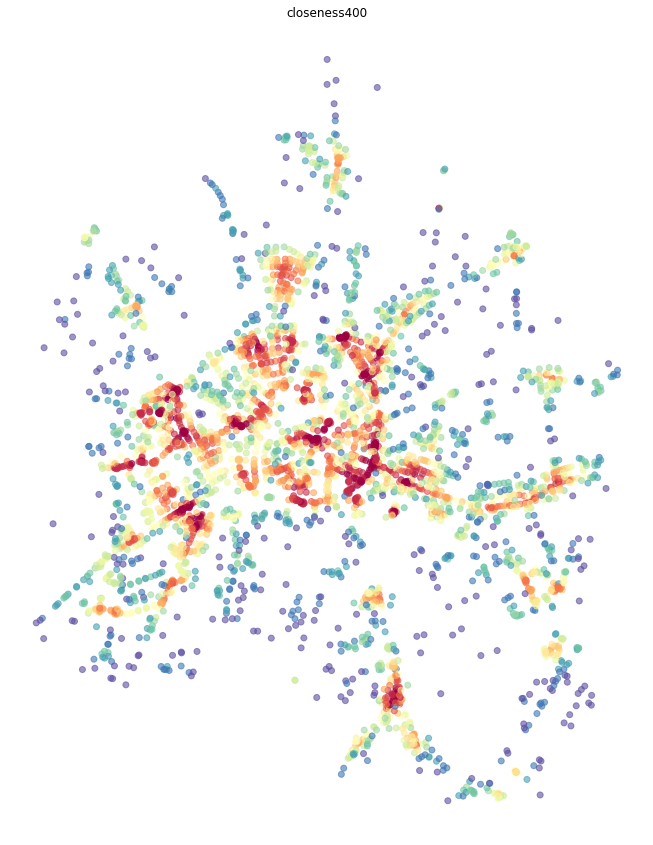

In [11]:
nodes = momepy.nx_to_gdf(primal, lines=False)
f, ax = plt.subplots(figsize=(15, 15))
nodes.plot(ax=ax, column='closeness400', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('closeness400')
plt.show()

In [12]:
# global closeness
primal = momepy.closeness_centrality(primal, name='closeness_global', weight='mm_len')

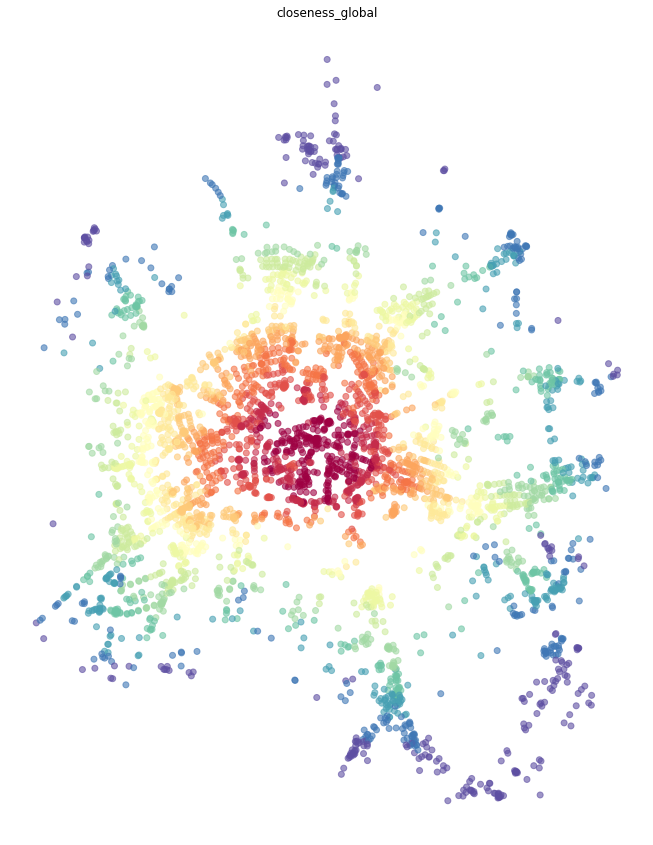

In [13]:
nodes = momepy.nx_to_gdf(primal, lines=False) # sw Q: How can we know that the nx_to_gdf generates nodes?
f, ax = plt.subplots(figsize=(15, 15))
nodes.plot(ax=ax, column='closeness_global', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('closeness_global')
plt.show()

## Betweenness centrality

In [14]:
primal = momepy.betweenness_centrality(primal, name='betweenness_metric_n', mode='nodes', weight='mm_len')

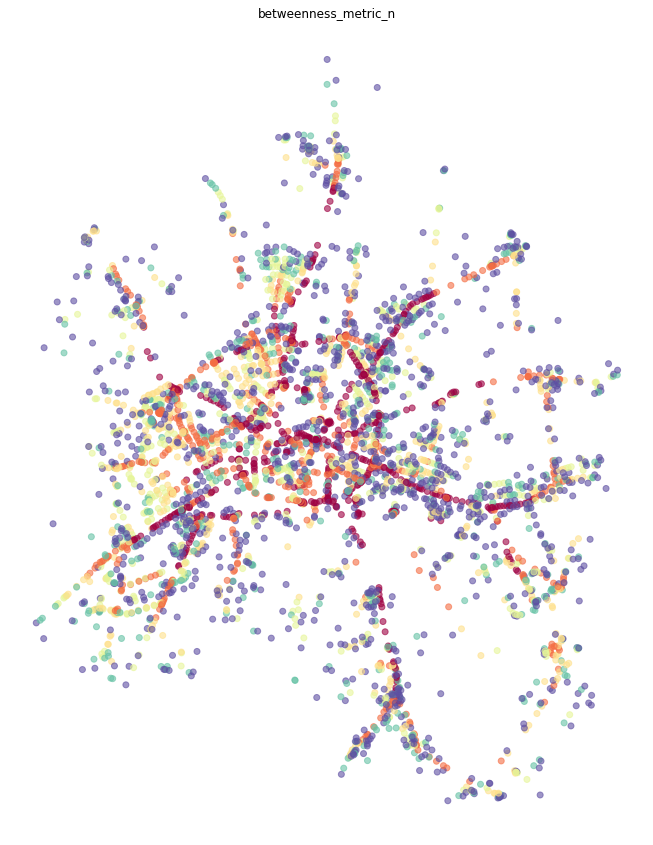

In [15]:
nodes = momepy.nx_to_gdf(primal, lines=False)
f, ax = plt.subplots(figsize=(15, 15))
nodes.plot(ax=ax, column='betweenness_metric_n', cmap='Spectral_r', scheme='quantiles', k=7, alpha=0.6)
ax.set_axis_off()
ax.set_title('betweenness_metric_n')
plt.show()

## Edge-based centrality

In [16]:
primal = momepy.betweenness_centrality(primal, name='betweenness_metric_e', mode='edges', weight='mm_len')

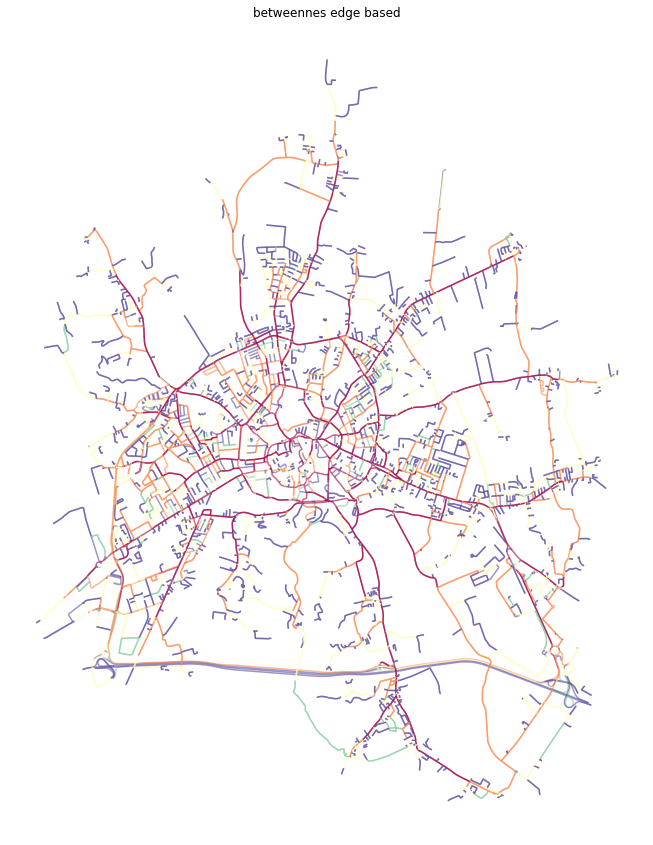

In [17]:
primal_gdf = momepy.nx_to_gdf(primal, points=False)
f, ax = plt.subplots(figsize=(15, 15))
primal_gdf.plot(ax=ax, column='betweenness_metric_e', cmap='Spectral_r', scheme='quantiles', alpha=0.6)
ax.set_axis_off()
ax.set_title('betweennes edge based')
plt.show()

## Other metrics.
Ignored.